## Libraries

In [1]:
import tempfile
import math
import os
from subprocess import call
import matplotlib.pyplot as plt
from f90nml import *
from array import *
import numpy as np
import pandas as pd 
import seaborn as sns
from statistics import *
import shutil
import sys
import time
from matplotlib.ticker import FormatStrFormatter

#read in printFolder, makeDefNameList, newFolder, deleteFolder, readOutput from coreFunctions.py
from coreFunctions import *

#read in plotting functionality from plottingFunctions.py
from plottingFunctions import *

call("rm -rf tmp*",shell=True)

dfModel = []#will contain output from our model

## Enter Custom Inputs, then Run the Model

Equilibrium Reached at Temp=287.09. At time=22.0
Final Temp(K): 291.7441101
Final Temp(F): 65.47



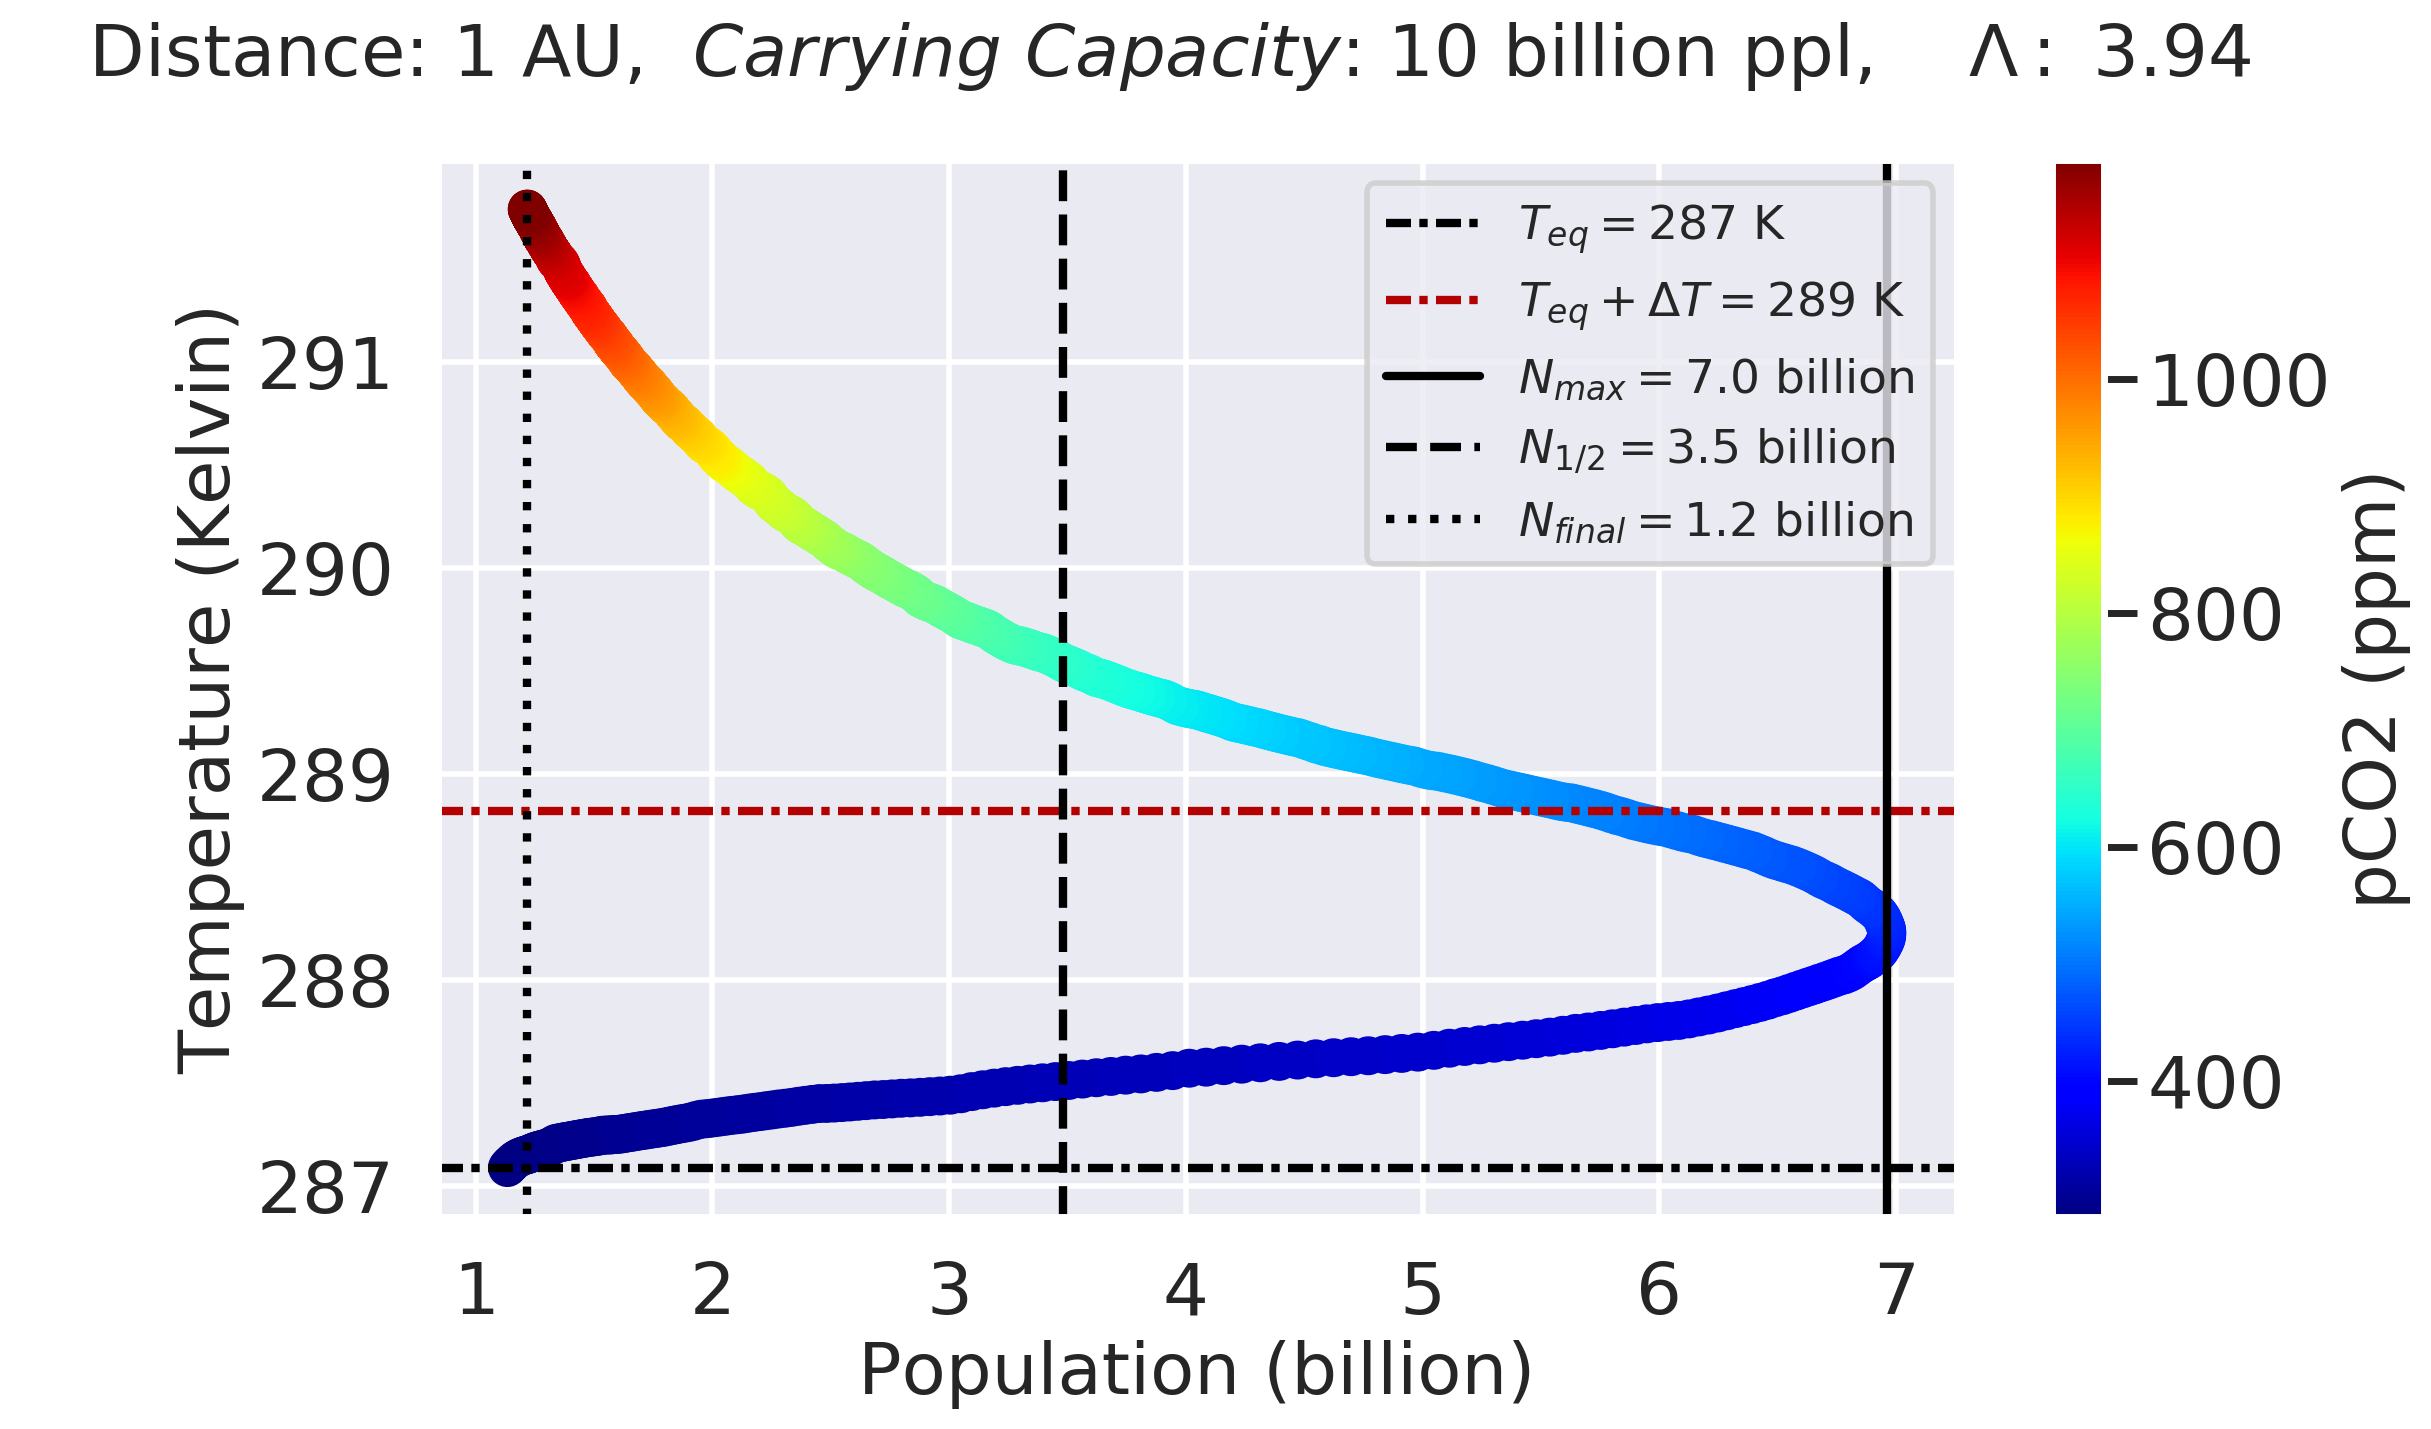

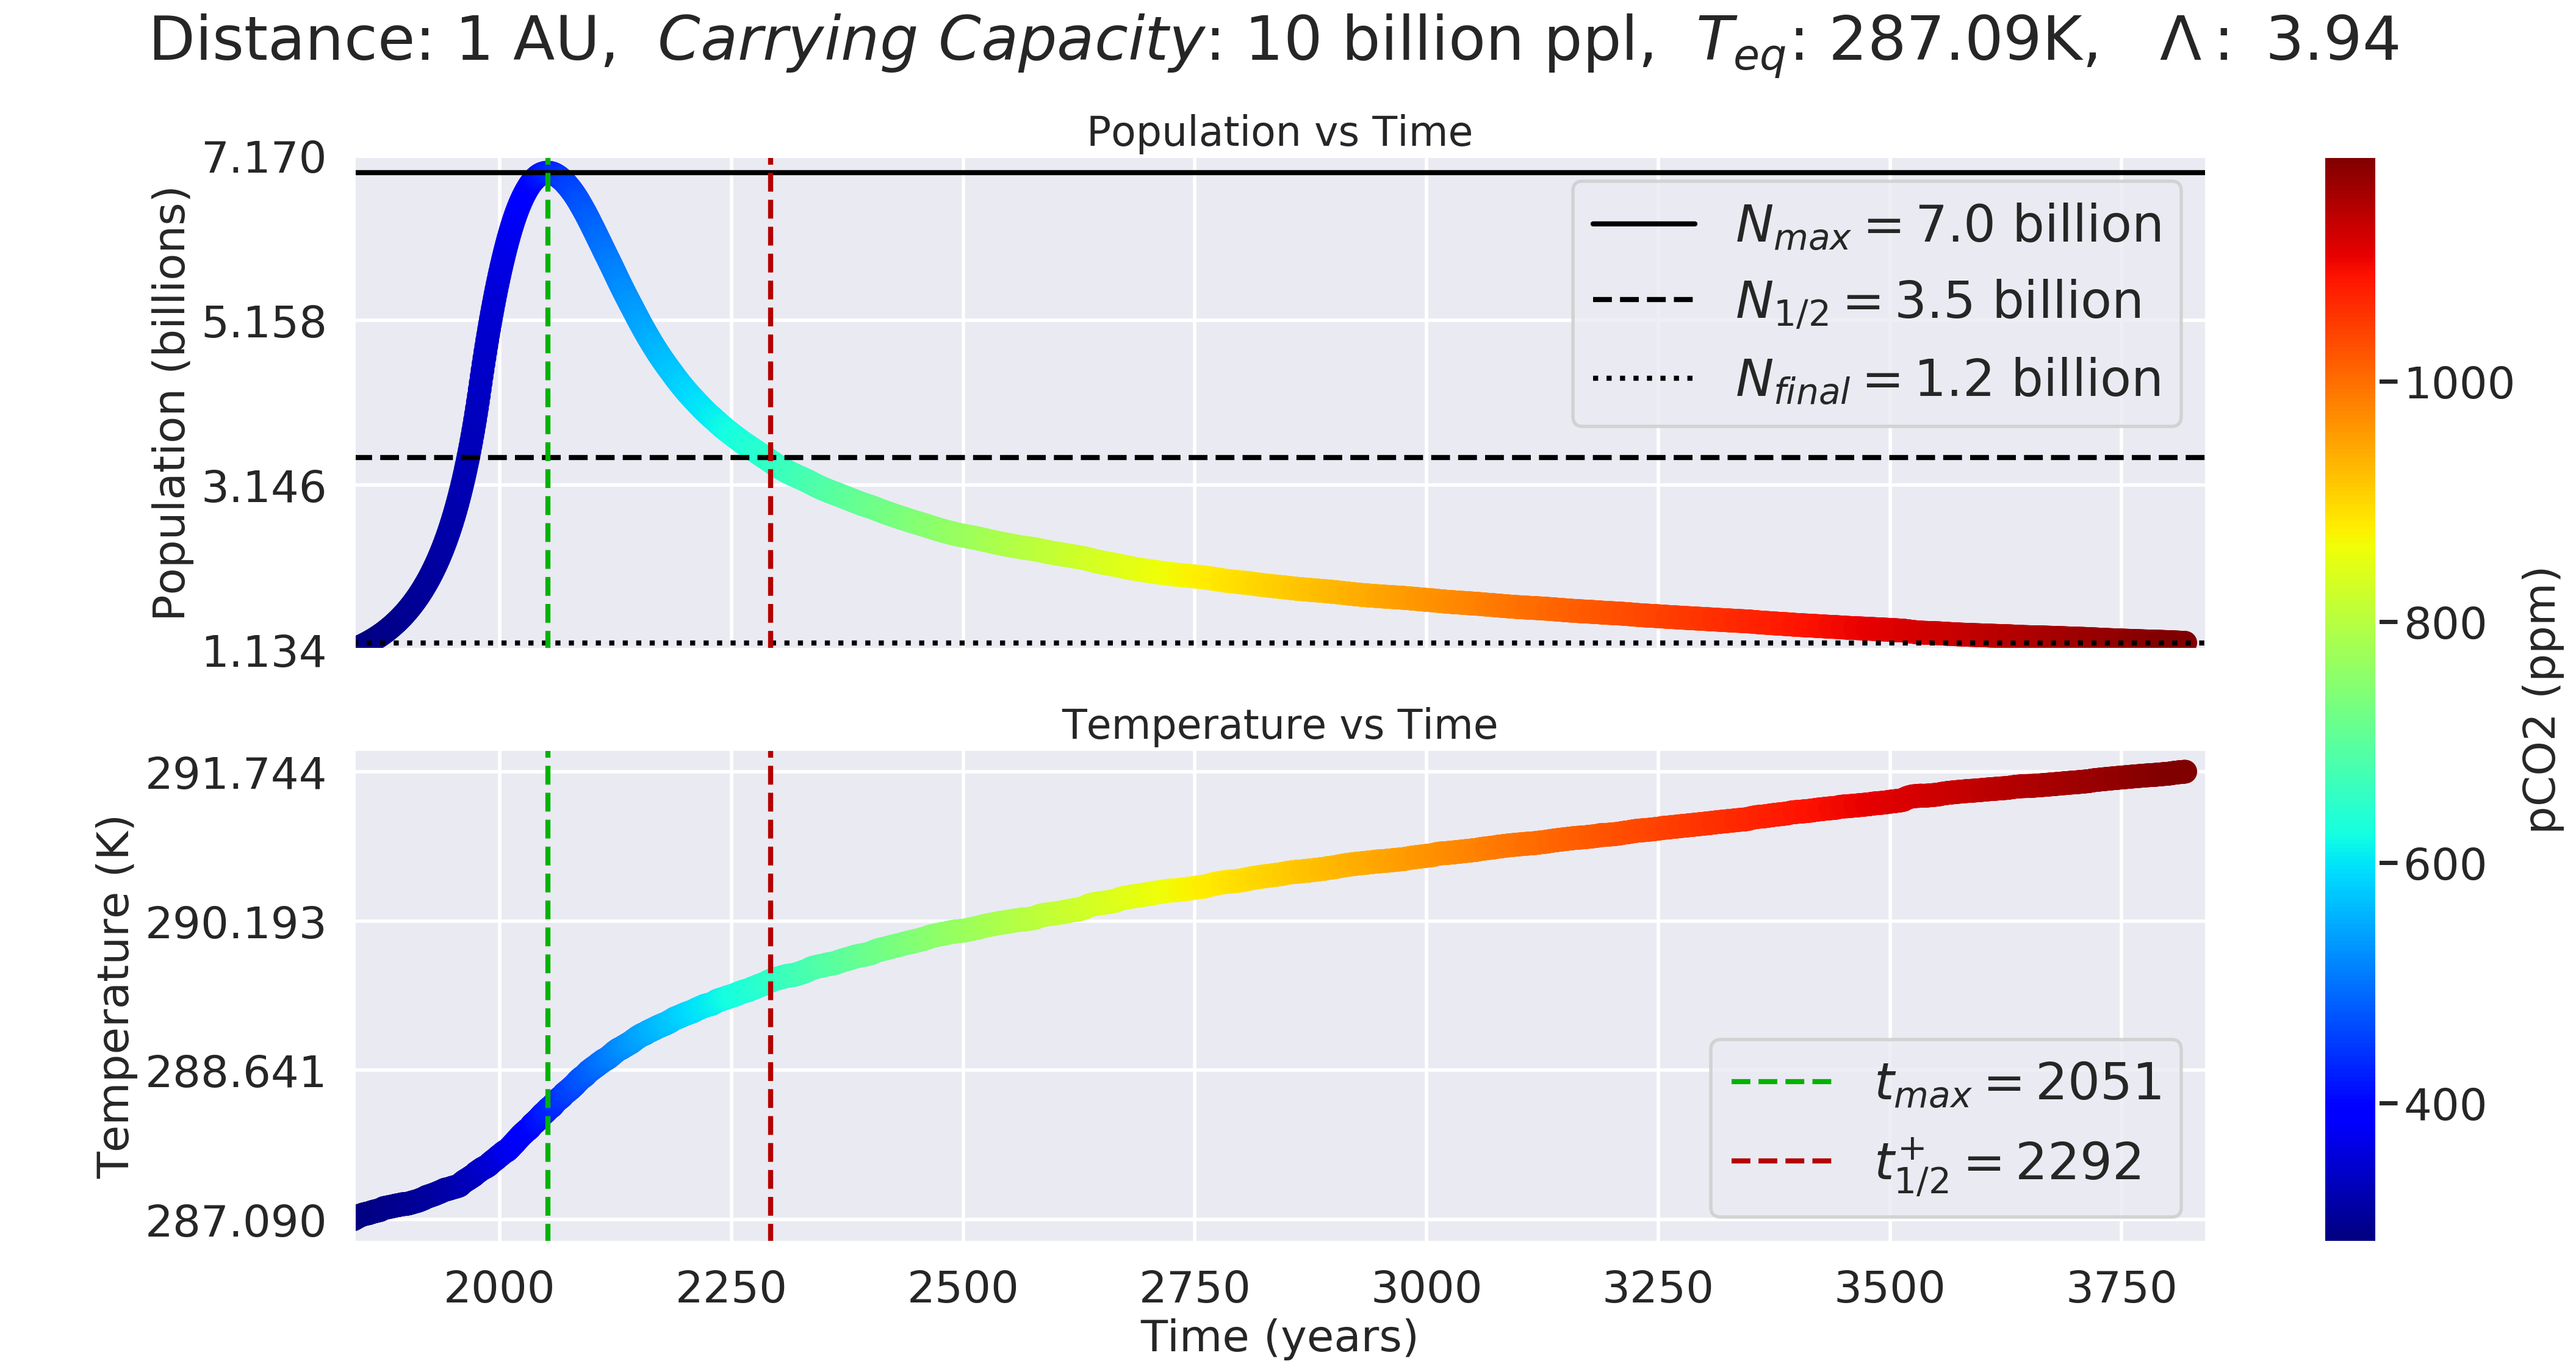

In [2]:
nameList = makeDefNamelist() #make namelist
#-------------------------------------Boolean Inputs--------------------------------------------------
plot=True;#make the fancy plots?
save=True;#save the file
life=False;
coupled=True
analyze = True #whether or not to analyze the population parts of model
lverbose=False #controls terminal output, used for debugging
#-------------------------------------Constant Inputs-------------------------------------------------
driverName = "driver.exe" 
#dTdP = 3016.718
newA=1                                 #Change distance  (AU)
runTime=2000                           #Change runtime   (years)
nameList['ebm']['relsolcon']=newA**-2 #inverse square law for solar flux
nameList['ebm']['rBirth0']=0.019;     #Initial Birth Rate
nameList['ebm']['rDeath0']=0.015;     #Initial Death Rate
nameList['ebm']['Nmax']=13000;        #Maximum Population
nameList['ebm']['dpco2']=6.3e-5;       #Initial Technological Abilities
nameList['ebm']['dtemp']=1.73#Fragility of Civilization
#------------------------------------Run the Model----------------------------------------------------

maxPopList = [10000] #specify all maxpops to use
distList= [1] #specify all distances to use
nameList['ebm']['lverbose'] = lverbose
dfModel,dfData = runModel(nameList, coupled, runTime, plot, save, analyze, driverName,maxPopList,distList)
#------------------------------------Plot the Results----------------------------------------------
#growthRates(dfModel,True) #true to compare growth rates
dfTemp = pd.read_csv('anomaly.csv');#data from NASA GISS: https://data.giss.nasa.gov/gistemp/graphs_v4/
dfPopCo2 = pd.read_csv('world_stats.csv');#data from Frank, Adam, and Woodruff Sullivan.
#compareModelOutput(dfModel,dfTemp,dfPopCo2)#compare the models output to true data
call("echo End of Python Notebook Reached", shell=True);

In [3]:
dictdTdP= {
        0.94 : 7.967*10**-2,
        0.97 : 4.94*10**-3,
        1.00 : 3.378*10**-3,
        1.03 : 1.959*10**-2,
        1.06 : 6.554*10**-4
}
i=1.00
dimVar = (nameList['ebm']['rBirth0']*nameList['ebm']['dtemp'])/(nameList['ebm']['Nmax']*nameList['ebm']['rco2']*dictdTdP[i])
print("Dimensionless Variable: " + str(round(dimVar,3)) + "\n")

Dimensionless Variable: 5.121



In [4]:
from scipy.stats import linregress
dfData = dfData.apply(pd.to_numeric, errors='coerce')
dfData = dfData.dropna()
dfData['pco2_ppm'] = dfData['pco2']*10**6
pco2 = np.asarray(dfData['pco2_ppm'])
temp = np.asarray(dfData['temp'])
m = linregress(pco2,temp).slope
b = linregress(pco2,temp).intercept
print("Slope: " + str("{:.3e}".format(m)))
print("Y-Intercept: " + str(round(b,3)))
# plt.plot(pco2,temp,label='Model Runs')
# plt.plot(pco2,pco2*m+b,label='linear fit')
# plt.legend(loc='best')

Slope: 4.778e-03
Y-Intercept: 286.246


In [5]:
import pylab
#-------------------------------------------------Inputs-------------------------------------
pco20 = nameList['ebm']['pco20']*10**6
distance = nameList['ebm']['relsolcon']**(-1/2)
#-------------------------------------------------Output-----------------------------------
pco2 = np.asarray(dfModel['pco2_ppm'])
dP = np.diff(pco2)
dT = np.diff(np.asarray(dfModel['temp']))
#-------------------------------------------------Fit-----------------------------------------
a=1.137*10**-3;
b=-407.2;
c=685.5;
#-------------------------------------------------Plots--------------------------------------
# pylab.plot(dP,dT,label="real data")
# pylab.plot(dP,a*dP,label="fitted data")
# plt.legend()

## Model Analysis

In [6]:
# dfTemp = pd.read_csv('anomaly.csv');#data from NASA GISS: https://data.giss.nasa.gov/gistemp/graphs_v4/
# dfPopCo2 = pd.read_csv('world_stats.csv');#data from Frank, Adam, and Woodruff Sullivan.
# plotModelInput(nameList)#plot the temperature dependence on the growth rate
# plotTruePopCo2(dfPopCo2) #plot true population values vs pco2
# compareModelOutput(dfModel,dfTemp,dfPopCo2)#compare the models output to true data

In [7]:
dfModel['today_time'] = np.asarray(dfModel['time_yrs'])+1820
#dfModel.iloc[150:300];
print(int(dfModel[  np.floor(dfModel.today_time) == 2020   ]['pop']))

6547
